In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Importing the data:

In [2]:
hypo_data=pd.read_csv("./data/allhypo_data.csv")
hyper_data=pd.read_csv("./data/allhyper_data.csv")

In [3]:
hypo_data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,M,f,f,f,f,f,f,f,f,...,t,155,t,1.05,t,148,f,?,SVI,negative.|3689
2796,73,M,f,t,f,f,f,f,f,f,...,t,63,t,0.88,t,72,f,?,other,negative.|3652
2797,75,M,f,f,f,f,f,f,f,f,...,t,147,t,0.8,t,183,f,?,other,negative.|1287
2798,60,F,f,f,f,f,f,f,f,f,...,t,100,t,0.83,t,121,f,?,other,negative.|3496


In [4]:
hyper_data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,M,f,f,f,f,f,f,f,f,...,t,155,t,1.05,t,148,f,?,SVI,negative.|3689
2796,73,M,f,t,f,f,f,f,f,f,...,t,63,t,0.88,t,72,f,?,other,negative.|3652
2797,75,M,f,f,f,f,f,f,f,f,...,t,147,t,0.8,t,183,f,?,other,negative.|1287
2798,60,F,f,f,f,f,f,f,f,f,...,t,100,t,0.83,t,121,f,?,other,negative.|3496


# Data Cleaning & Visualization:

In [5]:
for col in hypo_data.columns:
    print("column \"{}\" has similar values in two DataFrames? ".format(col), hypo_data[col].equals(hyper_data[col]))

column "age" has similar values in two DataFrames?  True
column "sex" has similar values in two DataFrames?  True
column "on thyroxine" has similar values in two DataFrames?  True
column "query on thyroxine" has similar values in two DataFrames?  True
column "on antithyroid medication" has similar values in two DataFrames?  True
column "sick" has similar values in two DataFrames?  True
column "pregnant" has similar values in two DataFrames?  True
column "thyroid surgery" has similar values in two DataFrames?  True
column "I131 treatment" has similar values in two DataFrames?  True
column "query hypothyroid" has similar values in two DataFrames?  True
column "query hyperthyroid" has similar values in two DataFrames?  True
column "lithium" has similar values in two DataFrames?  True
column "goitre" has similar values in two DataFrames?  True
column "tumor" has similar values in two DataFrames?  True
column "hypopituitary" has similar values in two DataFrames?  True
column "psych" has sim

In [6]:
hypo_data.loc[hypo_data["label"].str.contains("negative"),"label"]="negative"
hypo_data.loc[~(hypo_data["label"].str.contains("negative")),"label"]="hypothyroid"

hyper_data.loc[hyper_data["label"].str.contains("negative"),"label"]="negative"
hyper_data.loc[~(hyper_data["label"].str.contains("negative")),"label"]="hyperthyroid"

**combining the two DataFrames together:**

In [7]:
hyper_index=hyper_data[hyper_data["label"]=="hyperthyroid"].index
data=hypo_data.copy()
data.loc[hyper_index,"label"]="hyperthyroid"

In [8]:
print("shape of the resulted data set: ", data.shape)
counts=data["label"].value_counts()
counts

shape of the resulted data set:  (2800, 30)


negative        2503
hypothyroid      220
hyperthyroid      77
Name: label, dtype: int64

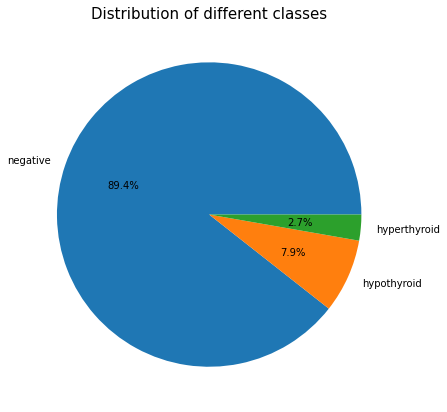

In [9]:
plt.figure(figsize=(7,7))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribution of different classes",fontsize=15)
plt.show()

In [10]:
data["age"].unique()

array(['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67',
       '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25',
       '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61',
       '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76',
       '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57',
       '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15',
       '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', '?', '93', '92'], dtype=object)

In [11]:
data=data.drop(data[(data["age"]=='?')].index)
data["age"]=data["age"].astype(int)
#removing unrealistic (or even false) samples with ages smaller than 1 or larger than 100
data=data[(data["age"]>0) & (data["age"]<100)]

In [12]:
data.shape

(2798, 30)

In [13]:
data=data.drop(["TBG measured","TBG","referral source"],axis=1) 

In [14]:
True_False_features=["on thyroxine", "query on thyroxine", "on antithyroid medication", "sick", "pregnant", "thyroid surgery", \
                     "I131 treatment","query hypothyroid", "query hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary",\
                     "psych", "TSH measured", "T3 measured", "TT4 measured", "T4U measured", "FTI measured"]

In [15]:
#make sure there are only True and False values in the list of columns above:
for col in True_False_features:
    print("unique values in \"{}\": ".format(col), data[col].unique())

unique values in "on thyroxine":  ['f' 't']
unique values in "query on thyroxine":  ['f' 't']
unique values in "on antithyroid medication":  ['f' 't']
unique values in "sick":  ['f' 't']
unique values in "pregnant":  ['f' 't']
unique values in "thyroid surgery":  ['f' 't']
unique values in "I131 treatment":  ['f' 't']
unique values in "query hypothyroid":  ['f' 't']
unique values in "query hyperthyroid":  ['f' 't']
unique values in "lithium":  ['f' 't']
unique values in "goitre":  ['f' 't']
unique values in "tumor":  ['f' 't']
unique values in "hypopituitary":  ['f' 't']
unique values in "psych":  ['f' 't']
unique values in "TSH measured":  ['t' 'f']
unique values in "T3 measured":  ['t' 'f']
unique values in "TT4 measured":  ['t' 'f']
unique values in "T4U measured":  ['t' 'f']
unique values in "FTI measured":  ['t' 'f']


In [16]:
for col in True_False_features:
    data.loc[data[col]=='f',col]=0.0
    data.loc[data[col]=='t',col]=1.0
    
data.loc[data["sex"]=='M',"sex"]=0.0
data.loc[data["sex"]=='F',"sex"]=1.0

In [17]:
numerical_features=["TSH", "T3", "TT4", "T4U", "FTI"]

In [18]:
for col in (numerical_features+["sex"]):
    data.loc[data[col]=='?',col]=np.nan
    data[col]=data[col].astype(float)

In [19]:
data.isnull().sum()

age                            0
sex                          110
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          284
T3 measured                    0
T3                           585
TT4 measured                   0
TT4                          184
T4U measured                   0
T4U                          297
FTI measured                   0
FTI                          295
label                          0
dtype: int64

In [20]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data=imputer.fit_transform(data[(numerical_features+["sex"])])
imputed_data=pd.DataFrame(imputed_data,columns=(numerical_features+["sex"]))

In [21]:
imputed_data

,TSH,T3,TT4,T4U,FTI,sex
0,1.30,2.5,125.0,1.14,109.0,1.0
1,4.10,2.0,102.0,0.98,107.0,1.0
2,0.98,2.0,109.0,0.91,120.0,0.0
3,0.16,1.9,175.0,0.98,107.0,1.0
4,0.72,1.2,61.0,0.87,70.0,1.0
...,...,...,...,...,...,...
2793,2.70,2.0,155.0,1.05,148.0,0.0
2794,1.40,0.7,63.0,0.88,72.0,0.0
2795,1.40,2.0,147.0,0.80,183.0,0.0
2796,1.40,2.0,100.0,0.83,121.0,1.0


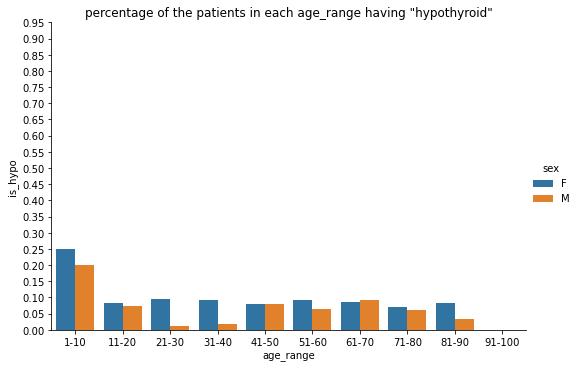

In [22]:
plot_df=data.copy()
plot_df["age_range"]=pd.cut(plot_df["age"],[0,10,20,30,40,50,60,70,80,90,100], labels=["1-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100"])
plot_df["is_hypo"]=plot_df["label"].apply(lambda x: 1 if x=="hypothyroid" else 0)
plot_df["is_hyper"]=plot_df["label"].apply(lambda x: 1 if x=="hyperthyroid" else 0)
plot_df["sex"]=hypo_data["sex"]
plot_df.loc[plot_df[col]=='?',col]=np.nan
plot_hypo=sns.catplot(x="age_range",y="is_hypo",hue="sex",data=plot_df, kind="bar",ci=None,legend=True,aspect=1.5)
plt.title("percentage of the patients in each age_range having \"hypothyroid\"")
plt.yticks(np.arange(0, 1, 0.05))
plt.show()

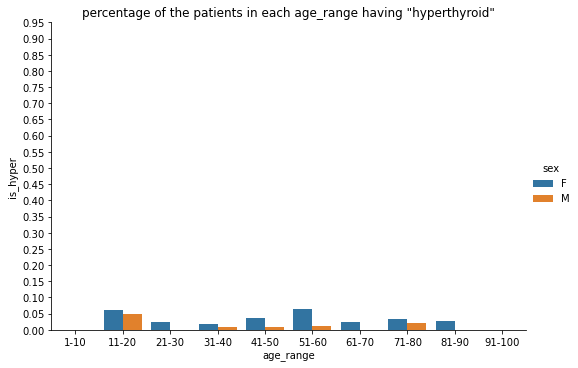

In [23]:
plot_hyper=sns.catplot(x="age_range",y="is_hyper",hue="sex",data=plot_df, kind="bar",ci=None,legend=True,aspect=1.5)
plt.title("percentage of the patients in each age_range having \"hyperthyroid\"")
plt.yticks(np.arange(0, 1, 0.05))
plt.show()

**As we can see above, diagnosing "hypothyroid" &"hyperthyroid" is vital.
For example, almost 25% of the girls and 20% of the boys aging from 1 to 10 have been suffer from "hypothyroid".**

In [24]:
data.reset_index(inplace=True)
for col in imputed_data:
    data[col] = imputed_data[col]
data=data.drop("index",axis=1)
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,label
0,41,1.0,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,negative
1,23,1.0,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,0.98,0,107.0,negative
2,46,0.0,0,0,0,0,0,0,0,0,...,0.98,0,2.0,1,109.0,1,0.91,1,120.0,negative
3,70,1.0,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,0.98,0,107.0,negative
4,70,1.0,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,70,0.0,0,0,0,0,0,0,0,0,...,2.70,0,2.0,1,155.0,1,1.05,1,148.0,negative
2794,73,0.0,0,1,0,0,0,0,0,0,...,1.40,1,0.7,1,63.0,1,0.88,1,72.0,negative
2795,75,0.0,0,0,0,0,0,0,0,0,...,1.40,0,2.0,1,147.0,1,0.80,1,183.0,negative
2796,60,1.0,0,0,0,0,0,0,0,0,...,1.40,0,2.0,1,100.0,1,0.83,1,121.0,negative


In [25]:
X=data.drop("label",axis=1)
y=data["label"]

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
y_train.value_counts()

negative        2000
hypothyroid      176
hyperthyroid      62
Name: label, dtype: int64

In [28]:
y_test.value_counts()

negative        501
hypothyroid      44
hyperthyroid     15
Name: label, dtype: int64

In [29]:
scaler= MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Training the model:

In [30]:
svc= SVC()
svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8964285714285715

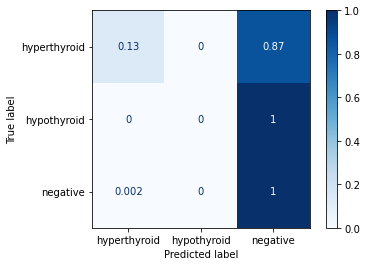

In [31]:
plot_confusion_matrix(svc, X_test, y_test,cmap="Blues", normalize="true")
plt.show()

**As we can see the classifier classifies the "hyperthyroid" & "hypothyroid" classes very poorly. We should tune the classifier so that it has a high recall for the "hyperthyroid" & "hypothyroid" classes (it predicts most of their samples). This might result in poorer performance for the negative cases (outputing False positives), but our main goal is to diagnose those who have problematic thyroid. Physicions can later determine whether the alarm was raised correctly by the system or not.**

# Tuning the model:

### 1) Applying the class_weights to consider the fact that the data is highly imbalanced:

In [32]:
svc= SVC(class_weight="balanced")
svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7017857142857142

In [33]:
svc.class_weight_

array([12.03225806,  4.23863636,  0.373     ])

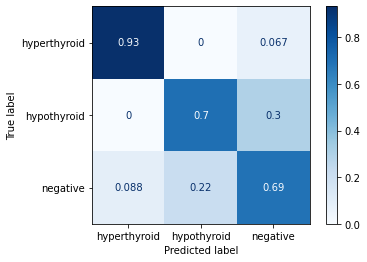

In [34]:
plot_confusion_matrix(svc, X_test, y_test,cmap="Blues", normalize="true")
plt.show()

In [35]:
index=["hypothyroid","hyperthyroid","negative"]
index.sort()

print("recall of different classes:")
pd.Series(recall_score(y_test,y_pred, average=None),index=index)

recall of different classes:


hyperthyroid    0.933333
hypothyroid     0.704545
negative        0.694611
dtype: float64

In [36]:
print("f1 score of different classes:")
pd.Series(f1_score(y_test,y_pred, average=None),index=index)

f1 score of different classes:


hyperthyroid    0.383562
hypothyroid     0.336957
negative        0.806489
dtype: float64

### 2) Tuning the hyperparameters (class_weight, C, kernel type, degree & gamma) to get the best performance:

**We would like to see a higher recall value for the "hypothyroid" class as a result we also includ a combination of weights in which "hypothyroid" has the highest weight.**

In [37]:
svm_hyperparameters = {'class_weight':[{"hyperthyroid":1400,"hypothyroid":460,"negative":42},
                                       {"hyperthyroid":1450,"hypothyroid":490,"negative":44},
                                       {"hyperthyroid":1490,"hypothyroid":520,"negative":45.5},
                                       {"hyperthyroid":1540,"hypothyroid":550,"negative":47},
                                       {"hyperthyroid":1490,"hypothyroid":550,"negative":45.5},
                                       {"hyperthyroid":1490,"hypothyroid":590,"negative":45.5},
                                       {"hyperthyroid":1490,"hypothyroid":640,"negative":45.5},
                                       {"hyperthyroid":1490,"hypothyroid":690,"negative":45.5}
                                      ],
                        'C': np.arange(0.5, 4.0, 0.5),
                        'kernel':['poly', 'rbf'], 
                        'degree':[3,4,5], 
                        'gamma':['auto','scale']}

In [38]:
def my_custom_f1_scorer(y,y_pred):
    f1=(f1_score(y,y_pred,average=None)*np.array([4,4,1])).sum()/9

    return f1 

In [39]:
def tune_the_model(estimator,hyperparameters,scorer,X,y,cv=10,):
    grid=GridSearchCV(estimator, param_grid=hyperparameters, scoring = scorer, n_jobs=-1, cv=cv)
    grid.fit(X,y)
    
    return grid.best_params_


In [40]:
f1_scorer= make_scorer(my_custom_f1_scorer,greater_is_better=True) 

In [41]:
svc=SVC()
tuned_parameters_f1=tune_the_model(svc,hyperparameters=svm_hyperparameters, scorer= f1_scorer, X = X_train, y = y_train, cv=10)
print("Best hyperparameters based on f1-score are:", tuned_parameters_f1)

Best hyperparameters based on f1-score are: {'C': 2.0, 'class_weight': {'hyperthyroid': 1490, 'hypothyroid': 640, 'negative': 45.5}, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


**Training the SVC classifier with the best hyperparameters (based on f1):**

In [42]:
svc=SVC(C= tuned_parameters_f1['C'], class_weight= tuned_parameters_f1['class_weight'], degree= tuned_parameters_f1['degree'],\
        gamma=tuned_parameters_f1['gamma'], kernel=tuned_parameters_f1['kernel'] ,probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9375

**evaluating the trained model:**

**1) Confusion Matrix:**

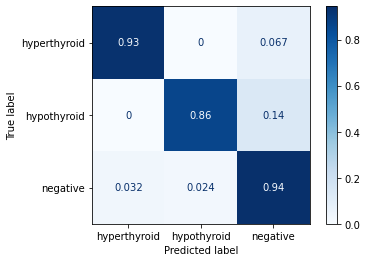

In [43]:
plot_confusion_matrix(svc, X_test, y_test,cmap="Blues", normalize="true")
plt.show()

**2) Recall & F1 score:**

In [44]:
print("recall of different classes:")
pd.Series(recall_score(y_test,y_pred, average=None),index=index)

recall of different classes:


hyperthyroid    0.933333
hypothyroid     0.863636
negative        0.944112
dtype: float64

In [45]:
print("f1 score of different classes:")
pd.Series(f1_score(y_test,y_pred, average=None),index=index)

f1 score of different classes:


hyperthyroid    0.622222
hypothyroid     0.808511
negative        0.964322
dtype: float64

**3) Precision-Recall curve and Average precision (area under PR curve):**

In [46]:
y_prob=svc.predict_proba(X_test)

In [47]:
# integer encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test)

# One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)  #OneHotEncoder expects a 2D array
onehot_encoded = onehot_encoder.fit_transform(integer_encoded) 

In [48]:
precision={}
recall={}
average_precision={}
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(onehot_encoded[:, i],y_prob[:, i])
    average_precision[i] = average_precision_score(onehot_encoded[:, i], y_prob[:, i])

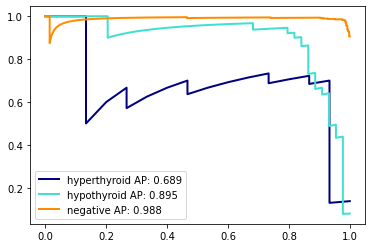

In [49]:
colors = ['navy', 'turquoise', 'darkorange']
for i, color in zip(range(3), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,label="{} AP: {:0.3f}".format(index[i],average_precision[i] ))
    
plt.legend()
plt.show()    